In [1]:
#pip install encoders

In [2]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import date


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce


### DATA UNDERSTANDING AND PREPERATION

In [3]:
# TAKE DATA FROM CSV 

h_p= pd.read_csv("C:\\Users\\LENOVO\\Downloads\\train.csv")
h_p.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# to check all columns
h_p.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [5]:
# to get a shape of dataframe
h_p.shape

(1460, 81)

In [6]:
h_p.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
h_p.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#check missing percentage
percent_missing = (h_p.isnull().sum() / h_p.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64

In [10]:
#Lets drop as it is an identifier
h_p.drop(['Id'],axis=1,inplace=True)

In [11]:
# We will drop the first 5 columns as they have large of data missing and this might have a negative effect on the model later
h_p.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [12]:
#checking missng values again
percent_missing = (h_p.isnull().sum() / h_p.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
dtype: float64

### Because the column that have missing 3 of that numeric rest are categorical column 
#### now we calculate the numeric column 

In [13]:
h_p[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


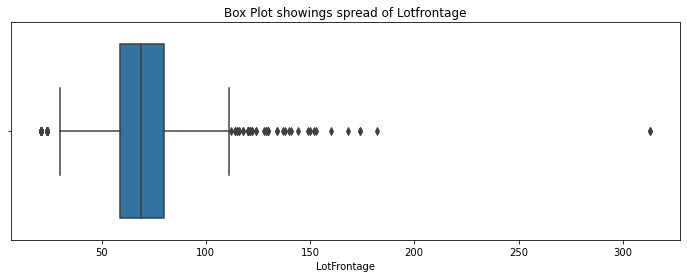

In [14]:
#LotFrontage
plt.figure(figsize=[12,4])
sns.boxplot(data =h_p, x='LotFrontage')
plt.title('Box Plot showings spread of Lotfrontage')
plt.show()

In [15]:
# in the Lotfrontage has approx 17% data missing and do the box plot shows it also has shown outlier hence imoputing using median instead of mean
h_p['LotFrontage']= h_p.LotFrontage.fillna(h_p.LotFrontage.median()) 

In [16]:
# to swn the MasVnr Area
h_p[['MasVnrArea']].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


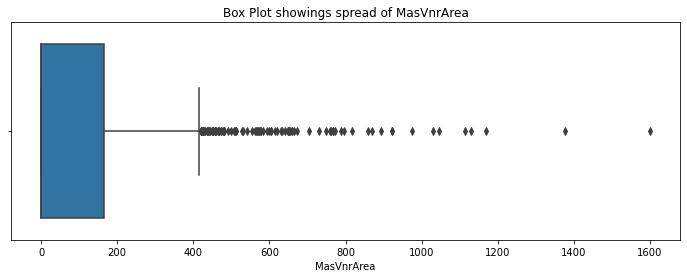

In [17]:
# here show thw plot of MasVnrArea
plt.figure(figsize=[12,4])
sns.boxplot(data =h_p, x='MasVnrArea')
plt.title('Box Plot showings spread of MasVnrArea')
plt.show()

In [18]:
#MasVnrArea contain approx 0.5% data missing and do the box plot shows it also has outlier hence imputing using median instead of mean
h_p['MasVnrArea']= h_p.MasVnrArea.fillna(h_p.MasVnrArea.median())

In [19]:
# here GarageYrBlt
h_p[['GarageYrBlt']].describe()

,GarageYrBlt
count,1379.000000
mean,1978.506164
std,24.689725
min,1900.000000
25%,1961.000000
50%,1980.000000
75%,2002.000000
max,2010.000000


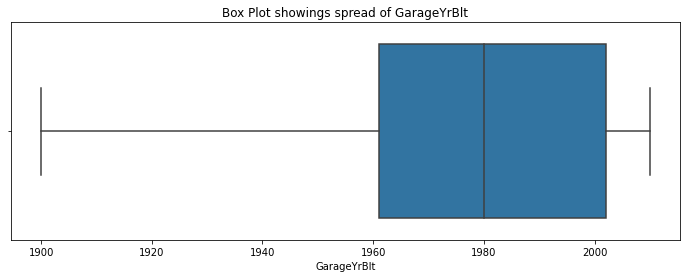

In [20]:
#here show the GarageYrBlt

plt.figure(figsize=[12,4])
sns.boxplot(data =h_p, x='GarageYrBlt')
plt.title('Box Plot showings spread of GarageYrBlt')
plt.show()

In [21]:
#GarageYrBlt contain approx 0.5% data missing and  do the box plot shows that it contain doesn't have outlier hence using mean to impute data

h_p['GarageYrBlt']= h_p.GarageYrBlt.fillna(h_p.GarageYrBlt.mean()) 

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

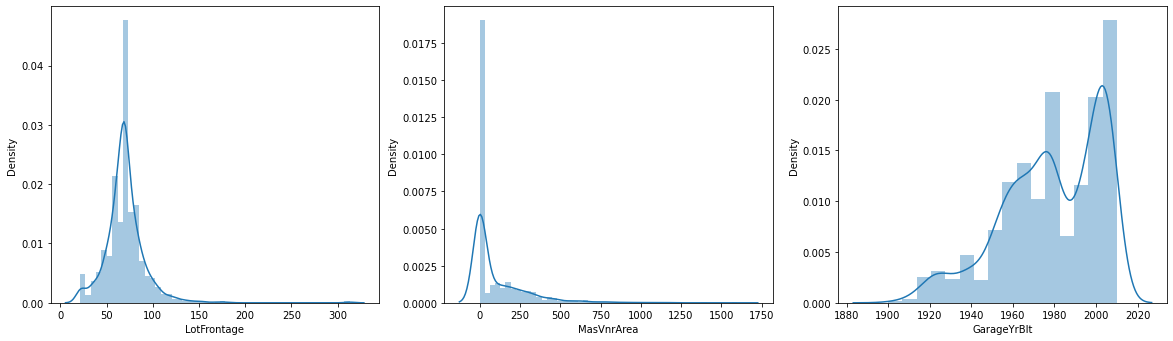

In [22]:
# plotting the 3 of here (i,e) LotFrontage , MasVnrArea , GarageYrblt
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(h_p['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(h_p['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(h_p['GarageYrBlt'])

## in data dictionary we know that NA for the following fields does not represent missing value but the lack of the feature for example NA in the GarageType doesnt mean that is missing, it represents that the house doesn't have a garage

## Using that as a base, we will change all NA's to corresponding entries from data dictionary

### Fields where this will be done are GarageType,GarageCond,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual

In [23]:
h_p['GarageType'] = h_p['GarageType'].replace(np.nan, 'No Garage')
h_p['GarageCond'] = h_p['GarageCond'].replace(np.nan, 'No Garage')
h_p['GarageFinish'] = h_p['GarageFinish'].replace(np.nan, 'No Garage')
h_p['GarageQual'] = h_p['GarageQual'].replace(np.nan, 'No Garage')
h_p['BsmtFinType2'] = h_p['BsmtFinType2'].replace(np.nan, 'No Basement')
h_p['BsmtExposure'] = h_p['BsmtExposure'].replace(np.nan, 'No Basement')
h_p['BsmtFinType1'] = h_p['BsmtFinType1'].replace(np.nan, 'No Basement')
h_p['BsmtCond'] = h_p['BsmtCond'].replace(np.nan, 'No Basement')
h_p['BsmtQual'] = h_p['BsmtQual'].replace(np.nan, 'No Basement')

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

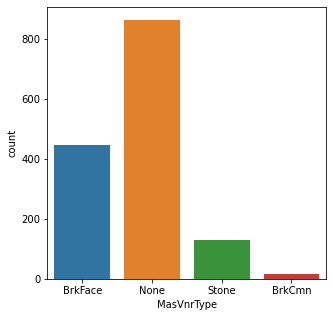

In [24]:
#Now taking care of NA where the data dictionary has no corresponding entries


plt.figure(figsize=(5, 5))
sns.countplot(x = 'MasVnrType', data = h_p)

In [25]:
#Get all numerical Columns
numerical_columns = h_p.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('SalePrice')

In [26]:
#Get all categorical Columns
categorical_columns = h_p.select_dtypes(include = np.object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',h_p[col].head().unique())

MSZoning  :  ['RL']
Street  :  ['Pave']
LotShape  :  ['Reg' 'IR1']
LandContour  :  ['Lvl']
Utilities  :  ['AllPub']
LotConfig  :  ['Inside' 'FR2' 'Corner']
LandSlope  :  ['Gtl']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
Condition1  :  ['Norm' 'Feedr']
Condition2  :  ['Norm']
BldgType  :  ['1Fam']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
RoofMatl  :  ['CompShg']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
ExterQual  :  ['Gd' 'TA']
ExterCond  :  ['TA']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
BsmtQual  :  ['Gd' 'TA']
BsmtCond  :  ['TA' 'Gd']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ']
BsmtFinType2  :  ['Unf']
Heating  :  ['GasA']
HeatingQC  :  ['Ex' 'Gd']
CentralAir  :  ['Y']
Electrical  :  ['SBrkr']
KitchenQual  :  ['Gd' 'TA']
Functional  :  ['Typ']
GarageType  :  ['Attchd' 'Detchd']
GarageFinish  :  ['RFn' 'Unf']
GarageQual  :  ['TA']
Gara

In [27]:
# None has the highest represntation in the above graph hence we will use "None" to replace all the NA's
h_p['MasVnrType'] = h_p['MasVnrType'].replace(np.nan, 'None')

<AxesSubplot:xlabel='Electrical', ylabel='count'>

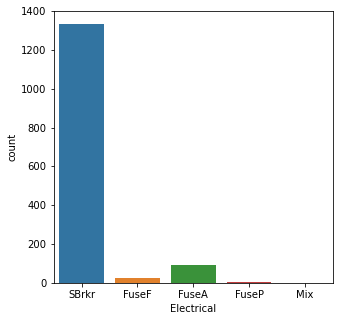

In [28]:
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Electrical', data = h_p)

In [29]:
# SBrkr has the highest showing in the above graph hence we will use "SBrkr" wil  replace all the value of NA's
h_p['Electrical'] = h_p['Electrical'].replace(np.nan, 'SBrkr')

In [30]:
# we have to rechecking for blanks
percent_missing = (h_p.isnull().sum() / h_p.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
dtype: float64

##### missing value identify

In [31]:
#we have to change  all the values which show up as continous values but are actually categorical values to categorical values
#These columns are - MSSubClass, OverallQual,OverallCond

In [32]:
h_p['MSSubClass']=h_p['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})


In [33]:
 h_p['OverallQual']=h_p['OverallQual'].replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

In [34]:
h_p['OverallCond']=h_p['OverallCond'].replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

### now we have convert year to age process

In [35]:
#Converting the year into age
current_year = date.today().year
h_p['YearBuilt_Age'] = current_year - h_p['YearBuilt']
h_p['YearRemodAdd_Age'] = current_year - h_p['YearRemodAdd']
h_p['YrSold_Age'] = current_year - h_p['YrSold']
h_p['GarageYrBlt_Age'] = current_year - h_p['GarageYrBlt']

In [36]:
# now we do drop the column replace the age 
h_p.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [37]:
h_p['YearBuilt_Age']

0        19
1        46
2        21
3       107
4        22
       ... 
1455     23
1456     44
1457     81
1458     72
1459     57
Name: YearBuilt_Age, Length: 1460, dtype: int64

In [38]:
#Because the MoSold should not have any effect on the dependant Variable
h_p.drop(['MoSold'], axis=1, inplace = True)

In [39]:
h_p.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,19,19,14,19.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,46,46,15,46.0
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,21,20,14,21.0
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,107,52,16,24.0
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,22,22,14,22.0


In [40]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   object 
 16  OverallCond       1460 non-null   object 


#### Exploring the data 

do the categorical column

In [41]:
#do the list of categorical values
cValues = h_p.select_dtypes(include=['object'])
cValues.shape

(1460, 41)

In [42]:
cValues.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

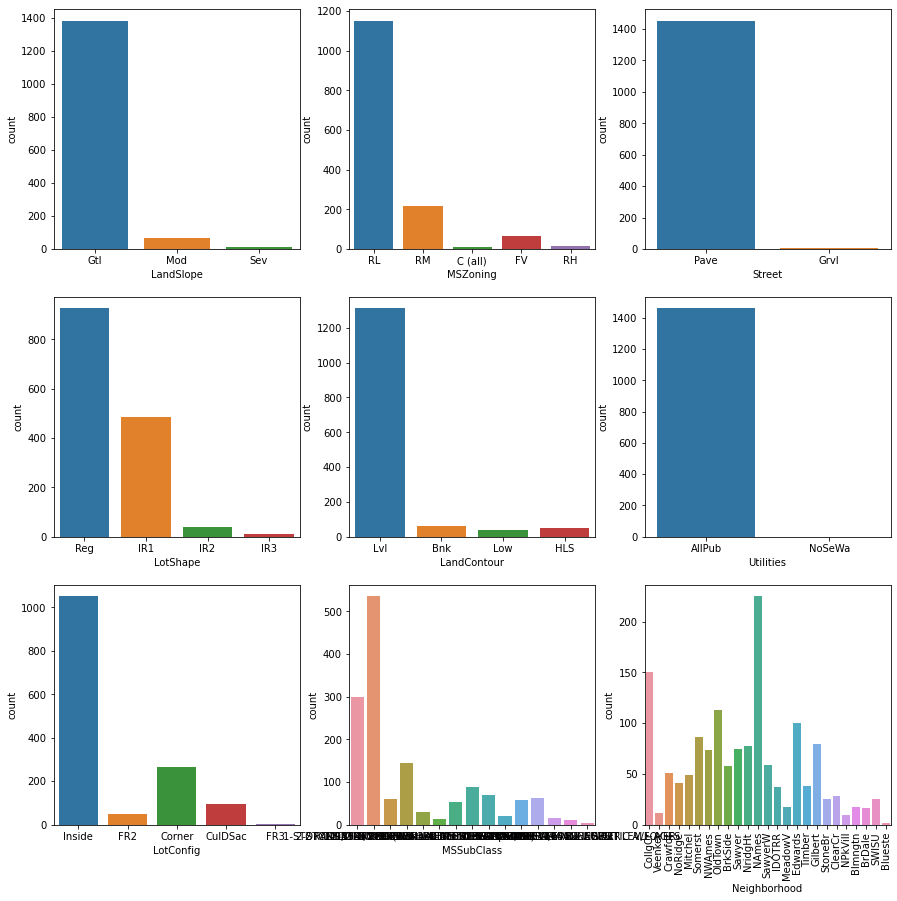

In [43]:
#We will do check the time in take 9 columns between them process
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'MSSubClass',  data = h_p,ax=axes[2,1])
plt.xticks(rotation=90)
sns.countplot(x = 'MSZoning',  data = h_p,ax=axes[0,1])
sns.countplot(x = 'Street',  data = h_p,ax=axes[0,2])
sns.countplot(x = 'LotShape',  data = h_p,ax=axes[1,0])
sns.countplot(x = 'LandContour',  data = h_p,ax=axes[1,1])
sns.countplot(x = 'Utilities',  data = h_p,ax=axes[1,2])
sns.countplot(x = 'LotConfig',  data = h_p,ax=axes[2,0])
sns.countplot(x = 'LandSlope',  data = h_p,ax=axes[0,0])
sns.countplot(x = 'Neighborhood',  data = h_p,ax=axes[2,2])
plt.xticks(rotation=90)
plt.show()

##### now we check the data column when its skewed 

In [44]:
#landslope
h_p.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [45]:
h_p.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [46]:
h_p.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Drop columns 

now we do drop columns because its is highly skewed data in particular value landslope , utilities

In [47]:
h_p.drop(['LandSlope','Utilities','Street'],axis=1,inplace=True)

In [48]:
#we have to take the next 9 column for checking

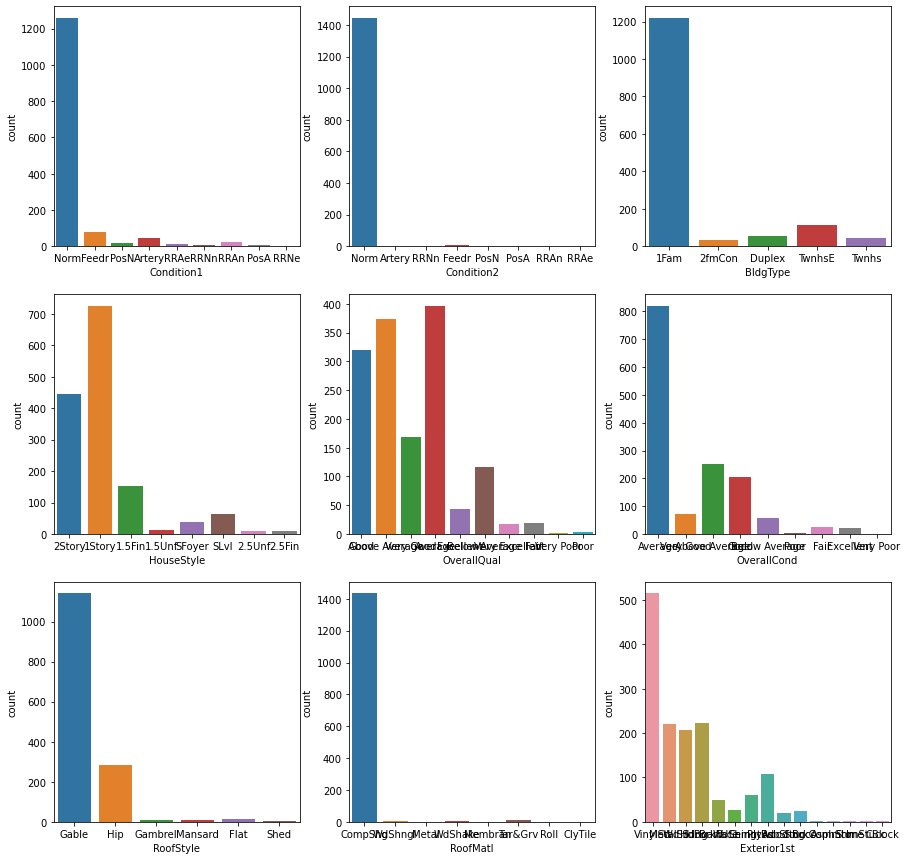

In [49]:
#Checking the next 9 values
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'Condition1',  data = h_p,ax=axes[0,0])
sns.countplot(x = 'Condition2',  data = h_p,ax=axes[0,1])
sns.countplot(x = 'BldgType',  data = h_p,ax=axes[0,2])
sns.countplot(x = 'HouseStyle',  data = h_p,ax=axes[1,0])
sns.countplot(x = 'OverallQual',  data = h_p,ax=axes[1,1])
sns.countplot(x = 'OverallCond',  data = h_p,ax=axes[1,2])
sns.countplot(x = 'RoofStyle',  data = h_p,ax=axes[2,0])
sns.countplot(x = 'RoofMatl',  data = h_p,ax=axes[2,1])
sns.countplot(x = 'Exterior1st',  data = h_p,ax=axes[2,2])
plt.show()


In [50]:
# we check the columns is is looking skewed or not 

In [51]:
h_p.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [52]:
h_p.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [53]:
# to drop the heating and functional value 

In [54]:
h_p.drop(['Heating','Functional'],axis=1,inplace=True)

In [55]:
# we have check the finest and last 5 column left in the data

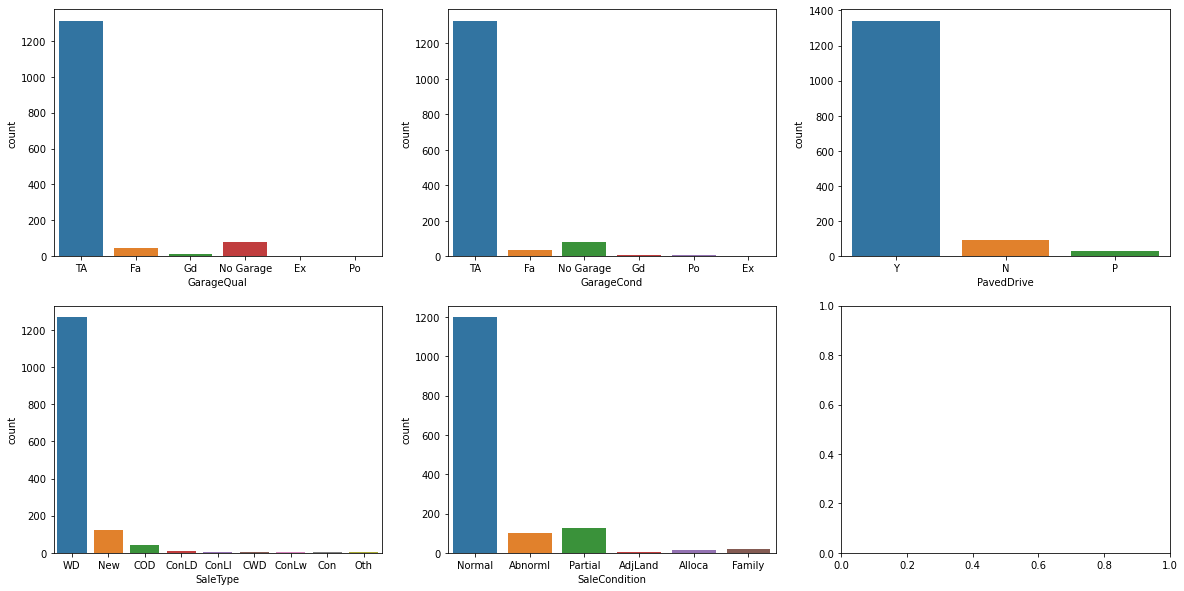

In [56]:
#Checking the last 5 column left
fig, axes = plt.subplots(2, 3,figsize=(20, 10))
sns.countplot(x = 'GarageQual',  data = h_p,ax=axes[0,0])
sns.countplot(x = 'GarageCond',  data = h_p,ax=axes[0,1])
sns.countplot(x = 'PavedDrive',  data = h_p,ax=axes[0,2])
sns.countplot(x = 'SaleType',  data = h_p,ax=axes[1,0])
sns.countplot(x = 'SaleCondition',  data = h_p,ax=axes[1,1])
plt.show()


#### we look the sales is skewed little bit but we cant drop the column so further 

# to checking the continuous value of its univariate 

In [57]:
conValues = h_p.select_dtypes(include=['Float64','Int64'])
conValues.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age'], dtype='object')

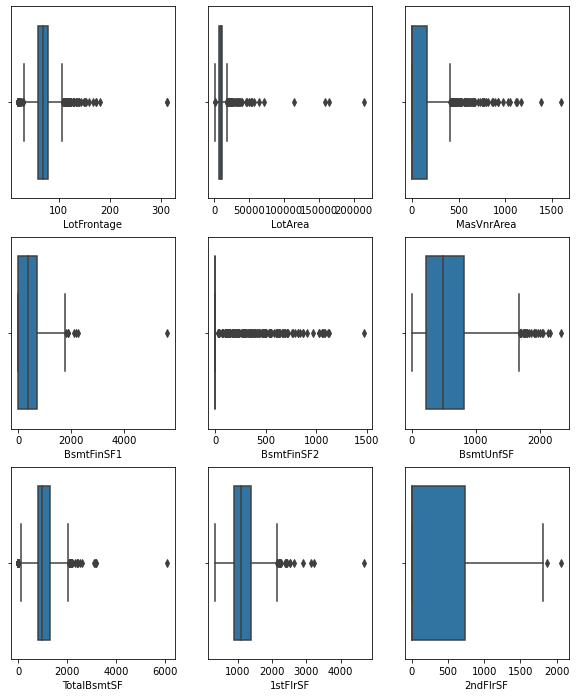

In [58]:
# we again check the first 9 columns
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'LotFrontage',  data = h_p,ax=axes[0,0])
sns.boxplot(x = 'LotArea',  data = h_p,ax=axes[0,1])
sns.boxplot(x = 'MasVnrArea',  data = h_p,ax=axes[0,2])
sns.boxplot(x = 'BsmtFinSF1',  data = h_p,ax=axes[1,0])
sns.boxplot(x = 'BsmtFinSF2',  data = h_p,ax=axes[1,1])
sns.boxplot(x = 'BsmtUnfSF',  data = h_p,ax=axes[1,2])
sns.boxplot(x = 'TotalBsmtSF',  data = h_p,ax=axes[2,0])
sns.boxplot(x = '1stFlrSF',  data = h_p,ax=axes[2,1])
sns.boxplot(x = '2ndFlrSF',  data = h_p,ax=axes[2,2])
plt.show()

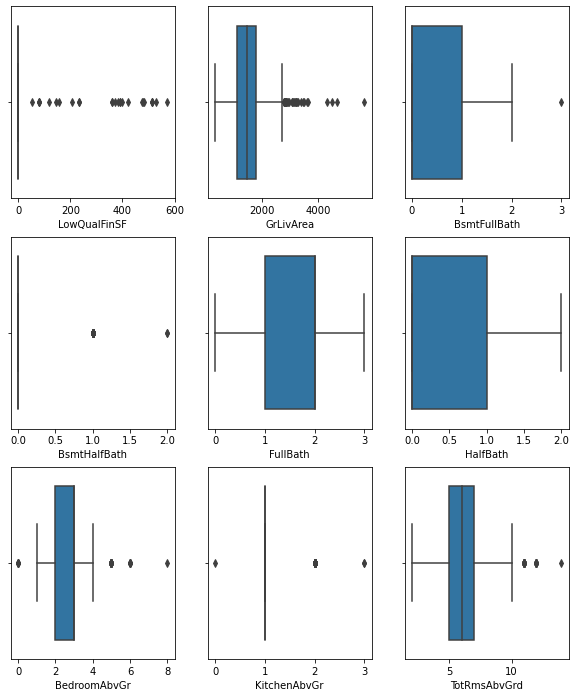

In [59]:
#again Checking the Next 9 Columns
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'LowQualFinSF',  data = h_p,ax=axes[0,0])
sns.boxplot(x = 'GrLivArea',  data = h_p,ax=axes[0,1])
sns.boxplot(x = 'BsmtFullBath',  data = h_p,ax=axes[0,2])
sns.boxplot(x = 'BsmtHalfBath',  data = h_p,ax=axes[1,0])
sns.boxplot(x = 'FullBath',  data = h_p,ax=axes[1,1])
sns.boxplot(x = 'HalfBath',  data = h_p,ax=axes[1,2])
sns.boxplot(x = 'BedroomAbvGr',  data = h_p,ax=axes[2,0])
sns.boxplot(x = 'KitchenAbvGr',  data = h_p,ax=axes[2,1])
sns.boxplot(x = 'TotRmsAbvGrd',  data = h_p,ax=axes[2,2])
plt.show()


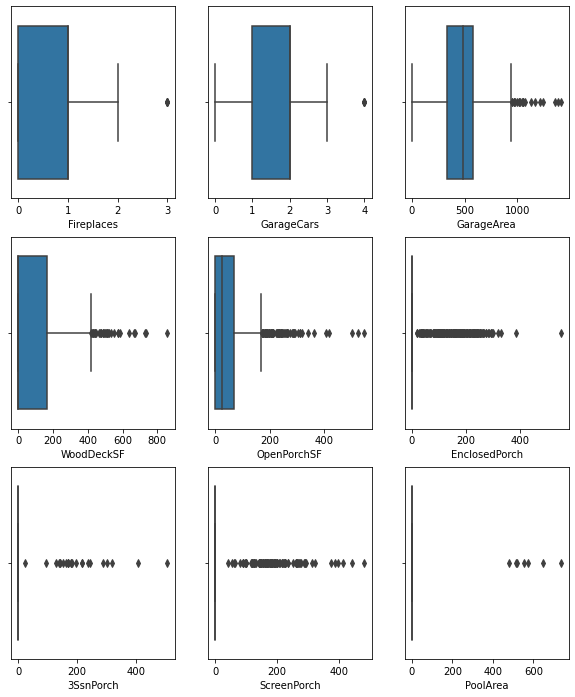

In [60]:
#agaian check the last 9 
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'Fireplaces',  data = h_p,ax=axes[0,0])
sns.boxplot(x = 'GarageCars',  data = h_p,ax=axes[0,1])
sns.boxplot(x = 'GarageArea',  data = h_p,ax=axes[0,2])
sns.boxplot(x = 'WoodDeckSF',  data = h_p,ax=axes[1,0])
sns.boxplot(x = 'OpenPorchSF',  data = h_p,ax=axes[1,1])
sns.boxplot(x = 'EnclosedPorch',  data = h_p,ax=axes[1,2])
sns.boxplot(x = '3SsnPorch',  data = h_p,ax=axes[2,0])
sns.boxplot(x = 'ScreenPorch',  data = h_p,ax=axes[2,1])
sns.boxplot(x = 'PoolArea',  data = h_p,ax=axes[2,2])
plt.show()

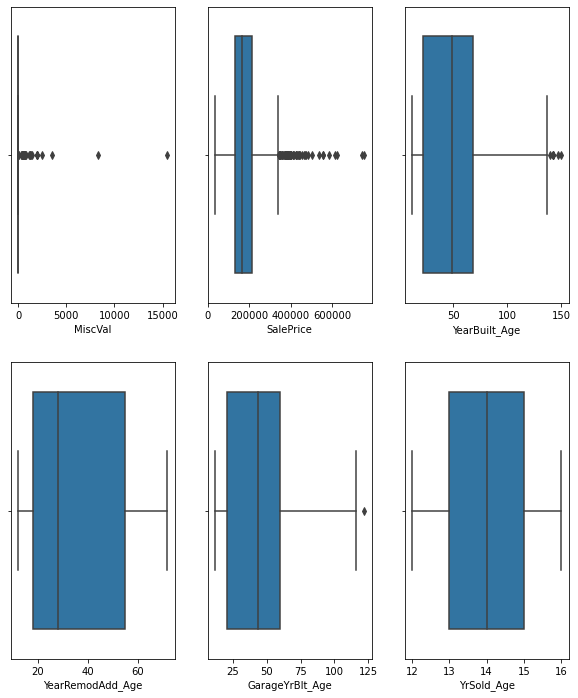

In [61]:
#Rest of the data
fig, axes = plt.subplots(2, 3,figsize=(10, 12))
sns.boxplot(x = 'MiscVal',  data = h_p,ax=axes[0,0])
sns.boxplot(x = 'SalePrice',  data = h_p,ax=axes[0,1])
sns.boxplot(x = 'YearBuilt_Age',  data = h_p,ax=axes[0,2])
sns.boxplot(x = 'YearRemodAdd_Age',  data = h_p,ax=axes[1,0])
sns.boxplot(x = 'GarageYrBlt_Age',  data = h_p,ax=axes[1,1])
sns.boxplot(x = 'YrSold_Age',  data = h_p,ax=axes[1,2])
plt.show()

In [62]:
#Checking the Dependant variable
h_p['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

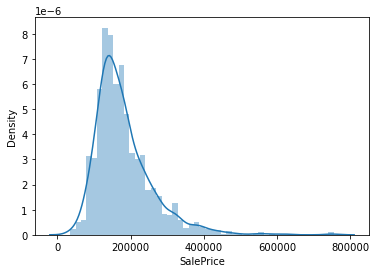

In [63]:
sns.distplot(h_p['SalePrice'])

In [64]:
# here we do lightly skew in data so use the log
h_p['SalePrice']=np.log(h_p.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

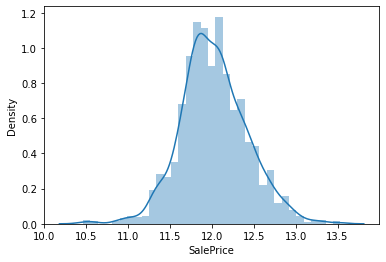

In [65]:
sns.distplot(h_p['SalePrice'])

###### here the data looks less skeweds now shown

In [66]:
h_p.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247694,19,19,14,19.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109011,46,46,15,46.0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317167,21,20,14,21.0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849398,107,52,16,24.0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429216,22,22,14,22.0
5,1-1/2 STORY FINISHED ALL AGES,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1.5Fin,Average,Average,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,0,Attchd,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,WD,Normal,11.870600,29,27,13,29.0
6,1-STORY 1946 & NEWER ALL STYLES,RL,75.0,10084,Reg,Lvl,Inside,Somerst,Norm,Norm,1Fam,1Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,1,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,WD,Normal,12.634603,18,17,15,18.0
7,2-STORY 1946 & NEWER,RL,69.0,10382,IR1,Lvl,Corner,NWAmes,PosN,Norm,1Fam,2Story,Good,Above Average,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,2,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,WD,Normal,12.206073,49,49,13,49.0
8,1-1/2 STORY FINISHED ALL AGES,RM,51.0,6120,Reg,Lvl,Inside,OldTown,Artery,Norm,1Fam,1.5Fin,Good,Average,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,2,Detchd,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,WD,Abnorml,11.774520,91,72,14,91.0
9,2 FAMILY CONVERSION - ALL STYLES AND AGES,RL,50.0,7420,Reg,Lvl,Corner,BrkSide,Artery,Artery,2fmCon,1.5Unf,Average,Above Average,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,2,Attchd,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,WD,Normal,11.678440,83,72,14,83.0


Text(0.5, 1.0, 'Heatmap showing corelations between variables')

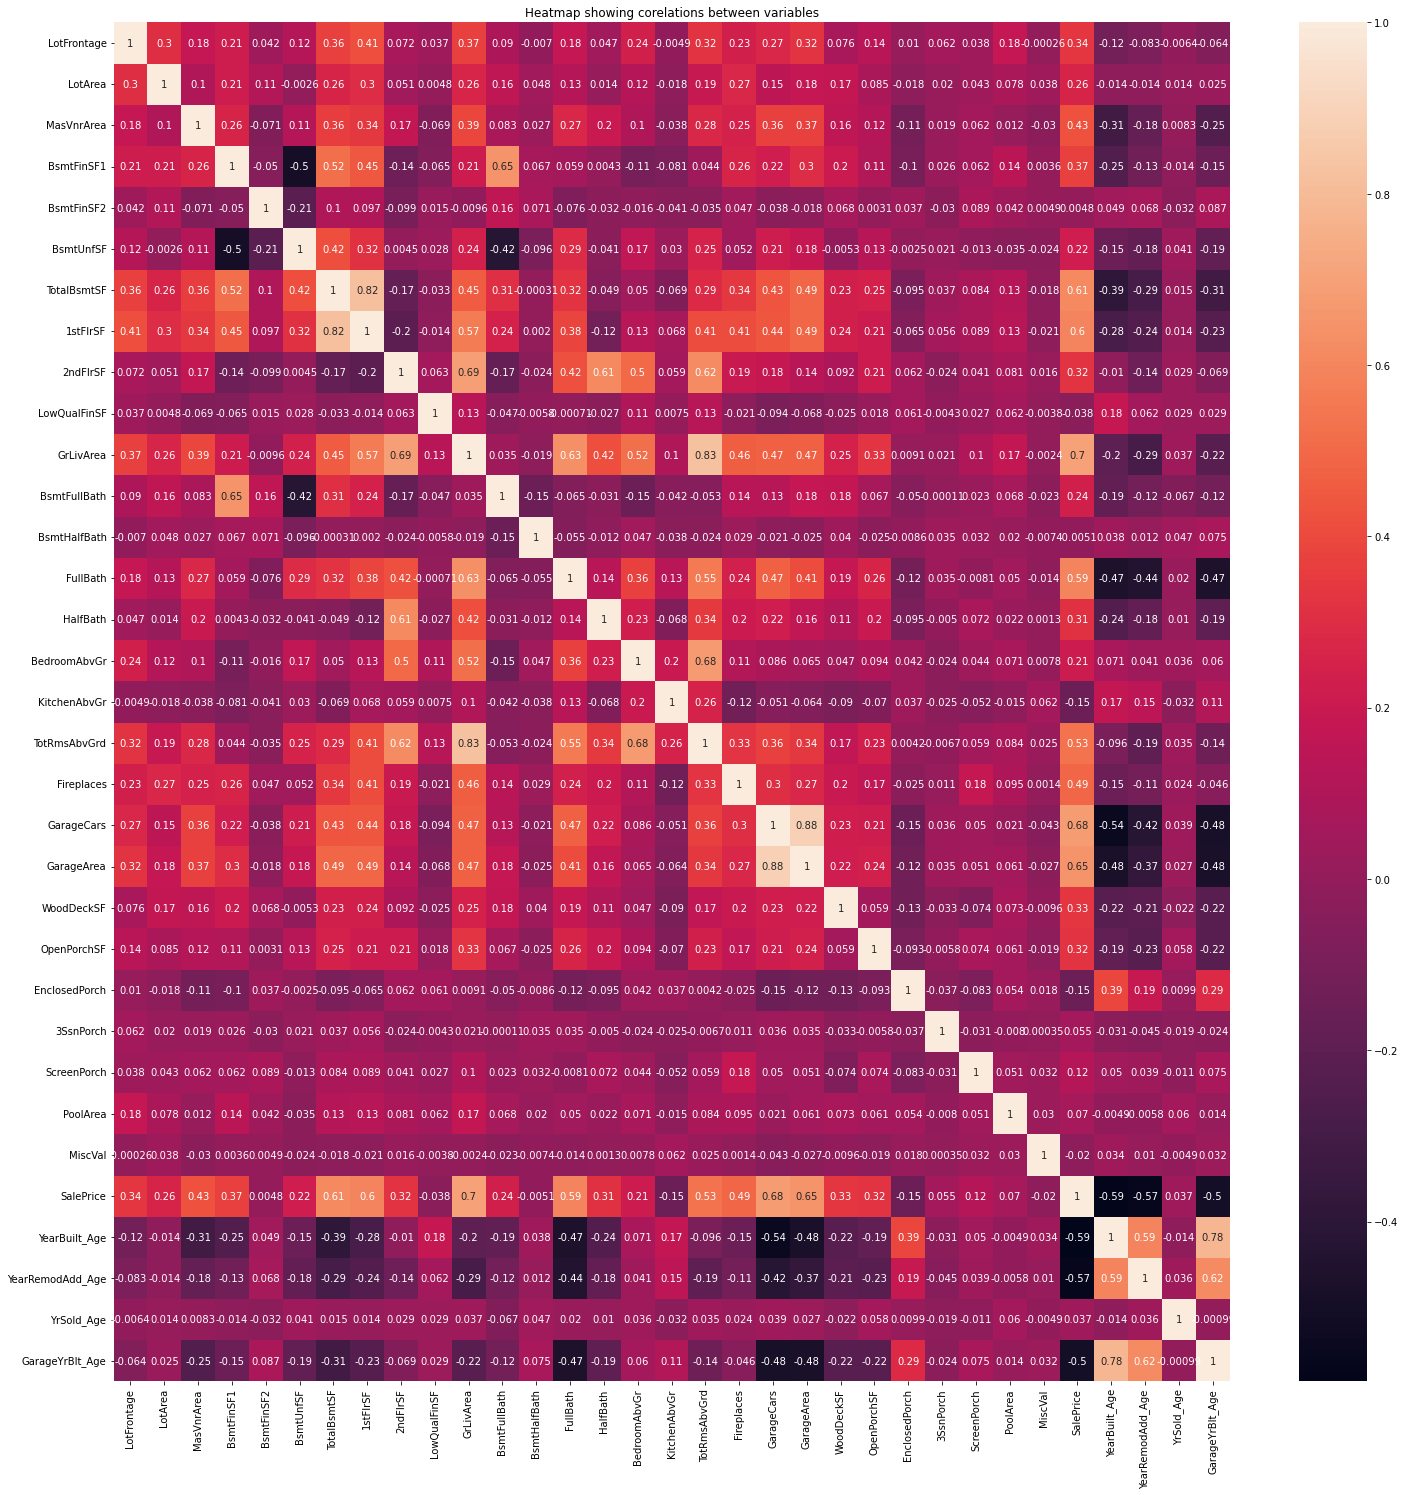

In [67]:
# we show the plot of heatmao between the corellation variable 
plt.figure(figsize=[25,25])
cor1=h_p.corr(method='pearson')
sns.heatmap(cor1,annot=True,)
plt.title('Heatmap showing corelations between variables')

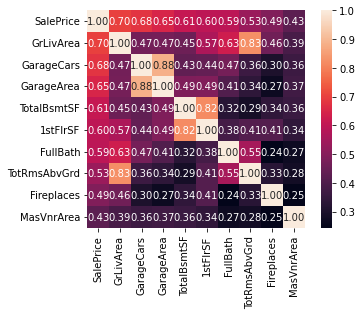

In [68]:
# in the above heatmap so much corellation between so its more confusing to plot so now to plot some top 20 correlation
#saleprice correlation matrix
corrmat = h_p.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(h_p[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [69]:
#Let's chcking data_frame shape
h_p.shape

(1460, 69)

In [70]:
corr_matrix = h_p.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [71]:
#Lets drop those three columns
h_p.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'],axis=1,inplace=True)

## Getting Dummy variable 
  
    ## Model Building

In [72]:
# Getting Dummy for Categorical Values
CategoryVar = h_p.select_dtypes(include=['object']) 
CategoryVar1 = pd.get_dummies(CategoryVar,drop_first=True) 
print(CategoryVar1.shape)

(1460, 221)


In [73]:
#Getting Numerical Values
NumVar = h_p.select_dtypes(include=['int64','float64']) 
NumVar.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age', 'GarageYrBlt_Age'], dtype='object')

In [74]:
NumVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   int64  
 2   MasVnrArea        1460 non-null   float64
 3   BsmtFinSF1        1460 non-null   int64  
 4   BsmtFinSF2        1460 non-null   int64  
 5   BsmtUnfSF         1460 non-null   int64  
 6   TotalBsmtSF       1460 non-null   int64  
 7   2ndFlrSF          1460 non-null   int64  
 8   LowQualFinSF      1460 non-null   int64  
 9   GrLivArea         1460 non-null   int64  
 10  BsmtFullBath      1460 non-null   int64  
 11  BsmtHalfBath      1460 non-null   int64  
 12  FullBath          1460 non-null   int64  
 13  HalfBath          1460 non-null   int64  
 14  BedroomAbvGr      1460 non-null   int64  
 15  KitchenAbvGr      1460 non-null   int64  
 16  Fireplaces        1460 non-null   int64  


In [75]:
CategoryVar1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConL

In [76]:
h_p = pd.concat([h_p, CategoryVar1], axis=1) 
h_p.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_

In [77]:
# Removing values where the data has been replaced with dummy values
h_p.drop(CategoryVar,axis=1,inplace=True) 

In [78]:
h_p.shape

(1460, 251)

In [79]:
h_p.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType

In [80]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 251 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(26), uint8(221)
memory usage: 657.4 KB


In [81]:
X = h_p.drop(['SalePrice'], axis=1)

y = h_p['SalePrice']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 250)
X_test Shape: (438, 250)
y_train Shape: (1021,)
y_test Shape: (438,)


In [83]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,G

In [84]:
#we transform the x test into fitting
X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age']] = scaler.transform(X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age']])

### RIDGE REGRESSION

In [85]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()
#Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.056334,-0.093724
1,{'alpha': 0.001},-0.056377,-0.093532
2,{'alpha': 0.01},-0.057012,-0.092718
3,{'alpha': 0.05},-0.059736,-0.093766
4,{'alpha': 0.1},-0.061637,-0.094678
5,{'alpha': 0.2},-0.063492,-0.095250
6,{'alpha': 0.3},-0.064514,-0.095248
7,{'alpha': 0.4},-0.065229,-0.095190
8,{'alpha': 0.5},-0.065784,-0.095052
9,{'alpha': 0.6},-0.066235,-0.094881


In [87]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

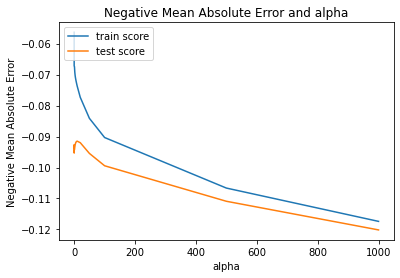

In [88]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
model_cv.best_params_

{'alpha': 10.0}

In [90]:
alpha = 10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-8.57341981e-03  1.66486952e-02  2.11086837e-03  7.48360646e-04
  8.68827276e-03  8.17805931e-03  1.19823245e-02  2.56428851e-02
 -3.90692402e-03  1.12497351e-01  2.54630612e-02  3.13292306e-03
  2.65010045e-02  1.43474173e-02  1.16364071e-02 -2.04297349e-02
  2.29814297e-02  4.77832101e-02  1.29834054e-02  1.08153448e-03
  7.94605835e-03  7.91667777e-03  1.08976838e-02 -1.52982390e-02
  1.44458393e-04 -3.98773260e-02 -2.83428650e-02  7.20767978e-03
  6.39146753e-03  9.20308176e-03 -6.28028557e-02  3.73017276e-02
  3.48242171e-03 -1.33217206e-03 -1.81891404e-03  3.73096637e-02
  5.15576760e-02 -3.19563620e-02 -6.69219943e-02  2.06293568e-02
 -3.01733087e-02  2.03400826e-02  6.08078335e-03  6.03438124e-02
  4.65068368e-02  6.66555793e-02  1.72086233e-02  2.40904930e-02
 -3.64953863e-02  7.26192983e-03  3.43695253e-02  3.44562468e-02
  4.05168907e-02  3.73719640e-02 -3.37420352e-02 -7.21916018e-03
 -9.10886086e-03 -3.42849528e-03 -1.20020041e-02  2.75287447e-02
  4.33316870e-02 -1.19321

In [91]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

r2_train_ridge=r2_score(y_train,y_pred_train_ridge)
print('R2 on Train: ')
print(r2_train_ridge)

r2_test_ridge=r2_score(y_test,y_pred_test_ridge)
print('R2 on Test: ')
print(r2_test_ridge)

rss1_ridge=np.sum(np.square(y_train-y_pred_train_ridge))
print('RSS on Train: ')
print(rss1_ridge)

rss2_ridge=np.sum(np.square(y_test-y_pred_test_ridge))
print('RSS on Test: ')
print(rss2_ridge)

mse_train_ridge=mean_squared_error(y_train, y_pred_train_ridge)
print('MSE on Train: ')
print(mse_train_ridge)

mse_test_ridge=mean_squared_error(y_test, y_pred_test_ridge)
print('MSE on Test: ')
print(mse_test_ridge)

R2 on Train: 
0.921992606638999
R2 on Test: 
0.8753649948175565
RSS on Train: 
12.51958147643791
RSS on Test: 
8.982266724970522
MSE on Train: 
0.01226207784176093
MSE on Test: 
0.020507458276188405


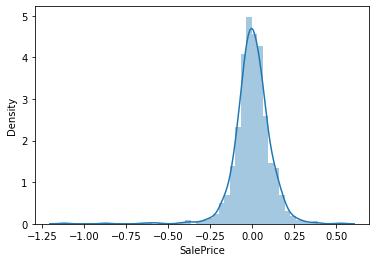

In [92]:
# HERE SHOW THE TRAIN RIDGE REGRESSION
sns.distplot((y_train-y_pred_train_ridge))
plt.show()


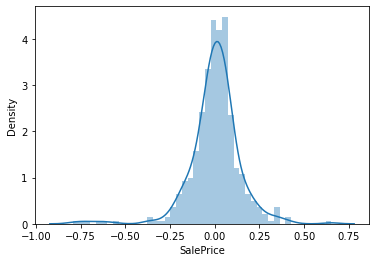

In [93]:
# HERE SHOW THE ERROR DISTURBING IN TEST RIDHE REGRSION
sns.distplot((y_test-y_pred_test_ridge))
plt.show()

### LASSO REGRESSION

In [94]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]


,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.062408,-0.089268
1,{'alpha': 0.001},-0.077861,-0.091267
2,{'alpha': 0.01},-0.111409,-0.114949
3,{'alpha': 0.05},-0.134543,-0.135751
4,{'alpha': 0.1},-0.167104,-0.167817
5,{'alpha': 0.2},-0.257391,-0.258239
6,{'alpha': 0.3},-0.310053,-0.310647
7,{'alpha': 0.4},-0.310053,-0.310647
8,{'alpha': 0.5},-0.310053,-0.310647
9,{'alpha': 0.6},-0.310053,-0.310647


In [96]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

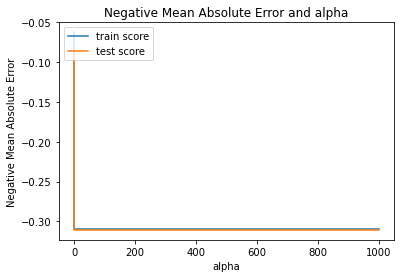

In [97]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [98]:
model_cv.best_params_

{'alpha': 0.0001}

In [99]:
alpha = 0.001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00700996  0.01446815  0.00218377 -0.          0.00267315  0.00467467
  0.02088714  0.00755496 -0.00601835  0.12796154  0.02742355  0.00417589
  0.02604957  0.01394493  0.00775154 -0.02158541  0.02380822  0.04913059
  0.01268576  0.          0.00786877  0.00628081  0.01057985 -0.01639771
 -0.         -0.04168776 -0.03258834  0.00684465  0.          0.
 -0.07400033  0.03176463 -0.          0.         -0.          0.
  0.01394853 -0.01919305 -0.07454293  0.         -0.          0.
  0.          0.01101476  0.          0.04552239 -0.          0.00028283
 -0.          0.          0.          0.          0.01743651  0.03575322
 -0.         -0.         -0.         -0.         -0.          0.01629779
  0.0278069  -0.          0.10838646 -0.07095083 -0.         -0.05163611
 -0.04779259 -0.         -0.00068467 -0.          0.          0.03669629
  0.08998349 -0.01384382  0.         -0.02030616  0.          0.09879291
  0.01587142 -0.          0.         -0.          0.05312856  0.
 -0.      

In [100]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

r2_train_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 on Train: ')
print(r2_train_lasso)

r2_test_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 on Test: ')
print(r2_test_lasso)

rss1_lasso=np.sum(np.square(y_train-y_pred_train_lasso))
print('RSS on Train: ')
print(rss1_lasso)

rss2_lasso=np.sum(np.square(y_test-y_pred_test_lasso))
print('RSS on Test: ')
print(rss2_lasso)

mse_train_lasso=mean_squared_error(y_train, y_pred_train_lasso)
print('MSE on Train: ')
print(mse_train_lasso)

mse_test_lasso=mean_squared_error(y_test, y_pred_test_lasso)
print('MSE on Test: ')
print(mse_test_lasso)

R2 on Train: 
0.9058791202469357
R2 on Test: 
0.8693566424921786
RSS on Train: 
15.10567103876091
RSS on Test: 
9.415280091360973
MSE on Train: 
0.014794976531597365
MSE on Test: 
0.021496073267947426


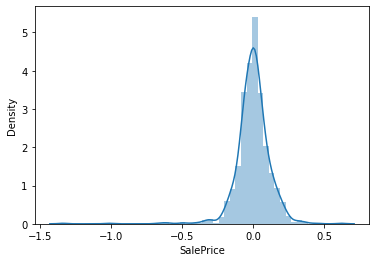

In [101]:
#TO SHOW THE ERROR DISTURBANCE IN TRAIN LASSO 
sns.distplot((y_train-y_pred_train_lasso))
plt.show()

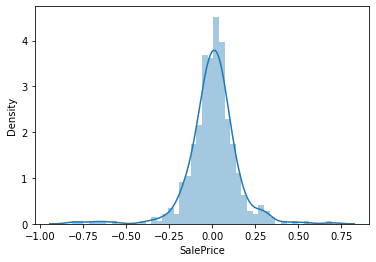

In [102]:
#TO SHOW THE ERROR DISTURBANCE IN TEST LASSO 
sns.distplot((y_test-y_pred_test_lasso))
plt.show()

In [103]:
betas= pd.DataFrame(index=X.columns)
betas.row=X.columns
betas['Ridge']=ridge.coef_
betas['lasso']=lasso.coef_
pd.set_option('display.max_rows',None)
betas.sort_values(by=['Ridge'])

,Ridge,lasso
OverallCond_Fair,-0.121954,-0.188074
Condition2_PosN,-0.087194,-0.043148
Neighborhood_Edwards,-0.084731,-0.070951
OverallQual_Poor,-0.075487,-0.000000
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.066922,-0.074543
MSSubClass_1-STORY 1945 & OLDER,-0.062803,-0.074000
BldgType_Twnhs,-0.062364,-0.050767
Neighborhood_MeadowV,-0.061247,-0.047793
Neighborhood_IDOTRR,-0.060548,-0.051636
BsmtQual_Gd,-0.056524,-0.025310


In [104]:
betas.sort_values(by=['lasso'])

,Ridge,lasso
OverallCond_Fair,-0.121954,-0.188074
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.066922,-0.074543
MSSubClass_1-STORY 1945 & OLDER,-0.062803,-0.074000
Neighborhood_Edwards,-0.084731,-0.070951
OverallQual_Below Average,-0.055928,-0.052875
OverallCond_Below Average,-0.051260,-0.052323
Neighborhood_IDOTRR,-0.060548,-0.051636
BldgType_Twnhs,-0.062364,-0.050767
Neighborhood_MeadowV,-0.061247,-0.047793
OverallCond_Average,-0.042174,-0.046299


In [105]:
# WE used the lasso model and get final output value of model in optimal value
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9058791202469357
0.8693566424921786


### CONCLUSION OF HOUSE PREDICTION....... 


In [ ]:
Business Goals 

              